In [22]:
import anndata
import pandas as pd
import scanpy as sc
import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition
import seaborn as sns
from scipy.io import mmread

In [5]:
os.chdir('/home/jing/Phd_project/project_GBM/gbm_OUTPUT_sctransform/')

In [8]:
def load_mtx_as_dataframe(data):
    # Read sparse matrix
    mtx = mmread(f"gbm_OUTPUT_sct_tumor_{data}_corrected_UMI.mtx").toarray()  # Convert to dense array
    
    # Read cell and gene names
    cells = pd.read_csv(f"gbm_OUTPUT_sct_tumor_{data}_corrected_UMI_cells.txt", header=None)[0].tolist()
    genes = pd.read_csv(f'gbm_OUTPUT_sct_tumor_{data}_corrected_UMI_genes.txt', header=None)[0].tolist()
    
    # Convert to DataFrame
    df = pd.DataFrame(mtx, index=cells, columns=genes)
    
    return df


In [11]:
pmr_tumor_df = load_mtx_as_dataframe("prm")
print(pmr_tumor_df.shape)
print(pmr_tumor_df.head())

(19588, 26221)
                            RP11-34P13.7  FO538757.2  AP006222.2  \
SF11082_AAACCCAAGCATCAAA-1           0.0         0.0         0.0   
SF11082_AAACCCAAGGCACGAT-1           0.0         0.0         0.0   
SF11082_AAACCCAGTAAGCGGT-1           0.0         0.0         0.0   
SF11082_AAACCCAGTTGTGTAC-1           0.0         0.0         0.0   
SF11082_AAACCCATCTGGAGAG-1           0.0         0.0         0.0   

                            RP4-669L17.10  RP5-857K21.4  RP11-206L10.9  \
SF11082_AAACCCAAGCATCAAA-1            0.0      0.693147       0.000000   
SF11082_AAACCCAAGGCACGAT-1            0.0      0.000000       0.693147   
SF11082_AAACCCAGTAAGCGGT-1            0.0      0.000000       0.000000   
SF11082_AAACCCAGTTGTGTAC-1            0.0      0.000000       0.000000   
SF11082_AAACCCATCTGGAGAG-1            0.0      0.000000       0.000000   

                            RP11-54O7.16  RP11-54O7.3  SAMD11     NOC2L  ...  \
SF11082_AAACCCAAGCATCAAA-1           0.0          0

In [12]:
rct_tumor_df = load_mtx_as_dataframe("rct")
print(rct_tumor_df.shape)
print(rct_tumor_df.head())

(19435, 26221)
                            RP11-34P13.7  FO538757.2  AP006222.2  \
SF11488_AAACCCAAGCGTGAGT-1           0.0    0.693147    0.000000   
SF11488_AAACCCAAGGTCACTT-1           0.0    0.000000    0.000000   
SF11488_AAACCCAAGTCATACC-1           0.0    0.000000    0.000000   
SF11488_AAACCCAGTGCCGGTT-1           0.0    0.000000    0.693147   
SF11488_AAACCCAGTTAACCTG-1           0.0    0.000000    0.000000   

                            RP4-669L17.10  RP5-857K21.4  RP11-206L10.9  \
SF11488_AAACCCAAGCGTGAGT-1            0.0      0.000000       0.000000   
SF11488_AAACCCAAGGTCACTT-1            0.0      0.000000       0.000000   
SF11488_AAACCCAAGTCATACC-1            0.0      1.098612       0.000000   
SF11488_AAACCCAGTGCCGGTT-1            0.0      0.000000       0.000000   
SF11488_AAACCCAGTTAACCTG-1            0.0      0.000000       0.693147   

                            RP11-54O7.16  RP11-54O7.3    SAMD11  NOC2L  ...  \
SF11488_AAACCCAAGCGTGAGT-1      0.000000     0.00000

In [81]:
cst_full = CellStateTransition('p_r_tumor_full', rct_tumor_df, pmr_tumor_df)

In [84]:
dpd_scores = cst_full.get_dpd()

norm_s = pd.DataFrame(np.stack([cst_full.n, cst_full.s], axis=1), index=cst_full.svm_input.data.columns, columns=["n", "s"])

print(cst_full.h)

0.09386663650536159


In [85]:
dpd_scores['Sample'] = dpd_scores.index.str.split('_').str[0]

In [88]:
dpd_scores['Stage'] ='Recurrent'
for i in ['SF2770', 'SF2990', 'SF3076', 'SF3391', 'SF11916', 'SF11082', 'SF9358', 'SF9798']:
    dpd_scores.loc[dpd_scores['Sample'].str.contains(i, na=False), 'Stage'] = 'Primary'

In [89]:
dpd_scores


,DPD_p_r_tumor_full,Sample,Stage
SF11488_AAACCCAAGCGTGAGT-1,-0.557442,SF11488,Recurrent
SF11488_AAACCCAAGGTCACTT-1,-1.314969,SF11488,Recurrent
SF11488_AAACCCAAGTCATACC-1,-1.555289,SF11488,Recurrent
SF11488_AAACCCAGTGCCGGTT-1,-0.931028,SF11488,Recurrent
SF11488_AAACCCAGTTAACCTG-1,-0.979602,SF11488,Recurrent
...,...,...,...
SF9798_TTTGGTTGTTGCCGAC-1,0.314387,SF9798,Primary
SF9798_TTTGGTTTCTGCATGA-1,0.572064,SF9798,Primary
SF9798_TTTGGTTTCTGTCCGT-1,1.446963,SF9798,Primary
SF9798_TTTGTTGAGATGACAT-1,0.316784,SF9798,Primary


In [90]:
dpd_scores['zeros'] =0 

<Axes: xlabel='DPD_p_r_tumor_full', ylabel='zeros'>

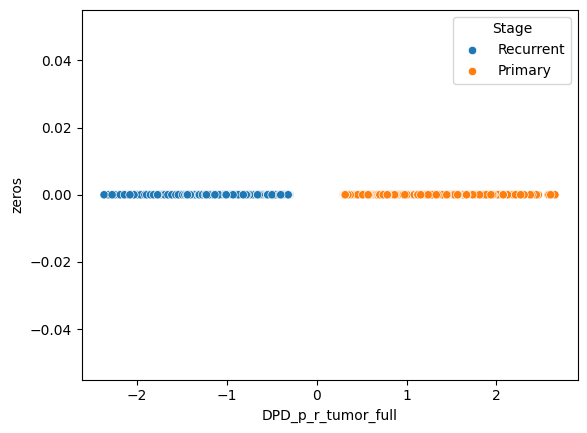

In [95]:
sns.scatterplot(x='DPD_p_r_tumor_full',y='zeros',hue='Stage',data=dpd_scores)

### full dim

In [47]:
gbm_stv = pd.read_excel('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/gbm_STVs.xlsx',
                        sheet_name='STVs',index_col=0)

In [68]:
gbm_stv.loc[common_genes,'GBM_onc']

DFFB      0.019947
ICMT     -0.080201
KLHL21   -0.012436
CLSTN1    0.010032
DFFA      0.013415
            ...   
SHB       0.000000
CCNA1     0.000000
GRB7      0.000000
PRR15L    0.000000
MMP1      0.000000
Name: GBM_onc, Length: 943, dtype: float64

In [69]:
dot_product = np.dot(rct_tumor_df[common_genes], gbm_stv.loc[common_genes, 'GBM_onc'])

In [78]:
print(dot_product.max(),dot_product.min())

0.64292669742695 -2.3517412583052164


In [76]:
p_dot_product = np.dot(pmr_tumor_df[common_genes], gbm_stv.loc[common_genes, 'GBM_onc'])

In [79]:
print(p_dot_product.max(),p_dot_product.min())

0.5151309793764076 -1.6806435894585885


In [51]:
rct_tumor_df[[gbm_stv.index]]

KeyError: "None of [Index([('AARS', 'ABCF1', 'ABL1', 'ACAA1', 'ACAT2', 'ACLY', 'ADAM10', 'ADH5', 'PARP1', 'ADRB2', 'AGL', 'AKT1', 'ALAS1', 'ALDOA', 'ALDOC', 'SLC25A4', 'ANXA7', 'APBB2', 'BIRC2', 'BIRC5', 'APOE', 'APP', 'FAS', 'RHOA', 'ARHGAP1', 'ASAH1', 'ATF1', 'ATP1B1', 'ALDH7A1', 'ATP6V0B', 'BAD', 'BAX', 'CCND1', 'BCL2', 'BDH1', 'BID', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'C5', 'DDR1', 'CALM3', 'CALU', 'CAPN1', 'CAST', 'CASP2', 'CASP3', 'CASP7', 'CASP10', 'CAT', 'CBLB', 'CBR1', 'CBR3', 'CCNA2', 'CCNB1', 'CCND3', 'CCNF', 'CCNH', 'SCARB1', 'CD40', 'CD44', 'CD58', 'ADGRE5', 'CDK1', 'CDC20', 'CDC25A', 'CDC25B', 'CDC42', 'CDH3', 'CDK2', 'CDK4', 'CDK6', 'CDK7', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CEBPA', 'CEBPD', 'CENPE', 'CETN3', 'CHEK1', 'CHN1', 'CIRBP', 'CLTB', 'CLTC', 'COL1A1', 'COL4A1', 'CREB1', 'CRK', 'CRKL', 'CRYZ', 'CSK', 'CSNK1A1', 'CSNK1E', ...)], dtype='object')] are in the [columns]"

In [13]:
lm_df=pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_Scripts/perturbations/01_outputs_2020/L1000_Data_norm_data.csv',index_col=0)
display(lm_df)

,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B12,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,...,MOAR010_BC3C_24H:K09,MOAR010_BC3C_24H:L19,MOAR010_BC3C_24H:L20,MOAR010_BC3C_24H:L21,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:J10
AARS,-0.496854,0.288446,0.189747,-0.016454,0.080746,0.282346,0.326246,0.244946,0.303046,0.387546,...,-0.217618,-0.074268,-0.012317,-0.004018,0.215100,-0.178100,-0.007000,0.024000,0.007400,0.031399
ABCB6,-0.658596,-0.142196,-0.075397,-0.383796,-0.199996,-0.074197,0.108804,0.055204,-0.399196,-0.227496,...,0.202852,-0.003798,-0.661323,0.326502,0.127850,0.081150,-0.026850,-0.152851,0.122550,-0.029350
ABCC5,-0.080204,0.231996,-0.329354,-0.225204,0.278446,0.034696,0.396596,0.288746,-0.255704,-0.254154,...,0.011493,0.187043,-0.051357,0.358943,0.197500,0.119350,0.212450,-0.177250,0.138650,0.568950
ABCF1,0.202535,0.602335,0.403335,0.313134,-0.083265,-0.056365,-0.387216,0.104534,0.097235,0.540634,...,-0.458439,1.132361,-0.555990,-0.556689,-0.036825,-0.080325,0.059175,0.307175,0.580075,0.322875
ABCF3,-0.520919,-0.192819,0.001032,-0.096419,0.210881,-0.731118,0.095381,0.049931,0.313481,-0.078018,...,0.201432,-0.028568,0.447982,0.610582,-0.378251,0.003950,0.127300,-0.197401,-0.128351,-0.012850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF395,1.796254,1.773154,0.668354,0.825354,0.350654,0.205954,-0.998346,-0.458247,0.235354,0.230653,...,-0.285181,-1.188080,-0.050680,-1.175880,0.300250,-0.265350,-0.380850,-0.330950,-1.844650,-0.612350
ZNF451,-0.244519,0.116732,0.058081,-0.178169,-0.080619,-0.139119,0.064681,-0.237719,-0.083019,-0.272119,...,0.085807,0.107632,-0.083718,0.105732,-0.324500,0.080550,-0.114950,-0.337650,-0.024950,-0.151550
ZNF586,0.097627,0.061027,-0.337573,0.098427,-0.338173,0.017627,-0.197423,-0.155173,-0.078473,-0.300473,...,0.056085,-0.005365,-0.123664,-0.191564,-0.304650,-0.259400,0.163600,-0.428700,-0.069200,0.073700
ZNF589,0.608573,0.106123,-0.014126,-0.003677,-0.123477,-0.243377,0.044623,0.092123,-0.021477,0.201823,...,-0.200241,-0.027441,0.007359,-0.072891,-0.315500,-0.013900,-0.035050,1.836400,-0.223300,-0.343400


In [20]:
common_genes = rct_tumor_df.columns.intersection(lm_df.index)
common_genes = pmr_tumor_df.columns.intersection(common_genes)
len(common_genes)

943

In [21]:
rct_tumor_lincs = rct_tumor_df[common_genes]
pmr_tumor_lincs = pmr_tumor_df[common_genes]
print(rct_tumor_lincs.shape,pmr_tumor_lincs.shape)

(19435, 943) (19588, 943)


In [23]:
cst_lincs = CellStateTransition('p_r_tumor', rct_tumor_lincs, pmr_tumor_lincs)

In [27]:
dpd_scores_lincs = cst_lincs.get_dpd()

norm_s_lincs = pd.DataFrame(np.stack([cst_lincs.n, cst_lincs.s], axis=1), index=cst_lincs.svm_input.data.columns, columns=["n", "s"])

print(cst_lincs.h)

0.11678422240887117


In [28]:
dpd_scores_lincs

,DPD_p_r_tumor
SF11488_AAACCCAAGCGTGAGT-1,-0.116503
SF11488_AAACCCAAGGTCACTT-1,-0.315458
SF11488_AAACCCAAGTCATACC-1,-0.424612
SF11488_AAACCCAGTGCCGGTT-1,0.009734
SF11488_AAACCCAGTTAACCTG-1,-0.325343
...,...
SF9798_TTTGGTTGTTGCCGAC-1,0.012464
SF9798_TTTGGTTTCTGCATGA-1,0.140401
SF9798_TTTGGTTTCTGTCCGT-1,0.154450
SF9798_TTTGTTGAGATGACAT-1,0.089577


In [29]:
dpd_scores_lincs['Sample'] = dpd_scores_lincs.index.str.split('_').str[0]

In [32]:
dpd_scores_lincs['Stage'] ='Recurrent'

In [33]:
for i in ['SF2770', 'SF2990', 'SF3076', 'SF3391', 'SF11916', 'SF11082', 'SF9358', 'SF9798']:
    dpd_scores_lincs.loc[dpd_scores_lincs['Sample'].str.contains(i, na=False), 'Stage'] = 'Primary'

In [34]:
dpd_scores_lincs

,DPD_p_r_tumor,Sample,Stage
SF11488_AAACCCAAGCGTGAGT-1,-0.116503,SF11488,Recurrent
SF11488_AAACCCAAGGTCACTT-1,-0.315458,SF11488,Recurrent
SF11488_AAACCCAAGTCATACC-1,-0.424612,SF11488,Recurrent
SF11488_AAACCCAGTGCCGGTT-1,0.009734,SF11488,Recurrent
SF11488_AAACCCAGTTAACCTG-1,-0.325343,SF11488,Recurrent
...,...,...,...
SF9798_TTTGGTTGTTGCCGAC-1,0.012464,SF9798,Primary
SF9798_TTTGGTTTCTGCATGA-1,0.140401,SF9798,Primary
SF9798_TTTGGTTTCTGTCCGT-1,0.154450,SF9798,Primary
SF9798_TTTGTTGAGATGACAT-1,0.089577,SF9798,Primary


In [35]:
dpd_scores_lincs['zeros'] =0 

<Axes: xlabel='DPD_p_r_tumor', ylabel='zeros'>

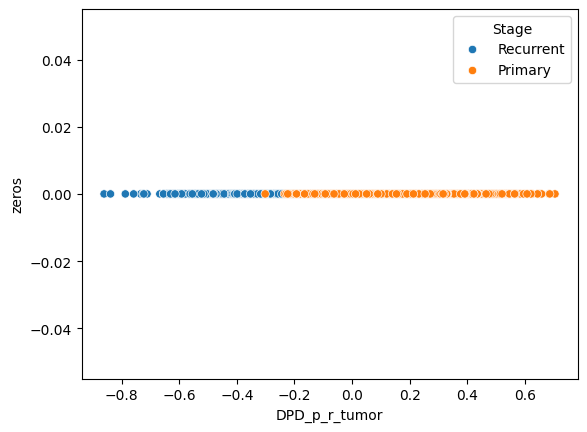

In [36]:
sns.scatterplot(x='DPD_p_r_tumor',y='zeros',data=dpd_scores_lincs,hue='Stage')

array([[<Axes: title={'center': 'DPD_p_r_tumor'}>,
        <Axes: title={'center': 'zeros'}>]], dtype=object)

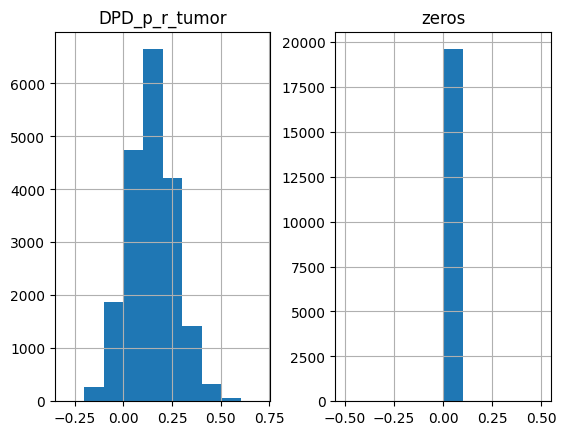

In [40]:
dpd_scores_lincs[dpd_scores_lincs['Stage']=='Primary'].hist()

array([[<Axes: title={'center': 'DPD_p_r_tumor'}>,
        <Axes: title={'center': 'zeros'}>]], dtype=object)

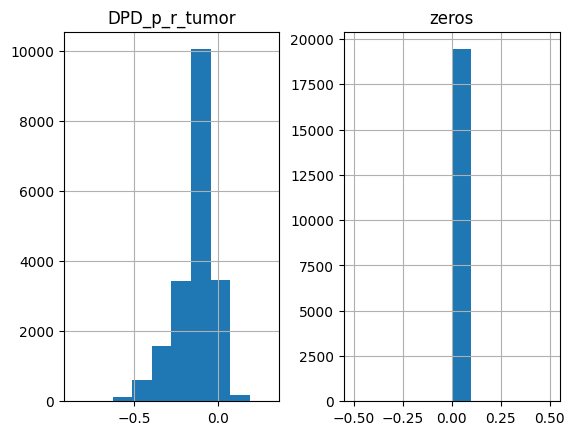

In [41]:
dpd_scores_lincs[dpd_scores_lincs['Stage']=='Recurrent'].hist()